In [13]:
# Principal component analysis in R

# Data

library("datasets")

data(iris)

str(iris)

summary(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [14]:

# Adjust the size of all plots in R in kaggle notebooks

library(repr) ;
options(repr.plot.width=16, repr.plot.height = 9)

In [15]:
# partition Data

set.seed(111)

ind = sample(2, nrow(iris), 
            replace = TRUE,
            prob = c(0.8, 0.2))

training = iris[ind ==1,]
testing  = iris[ind ==2,]

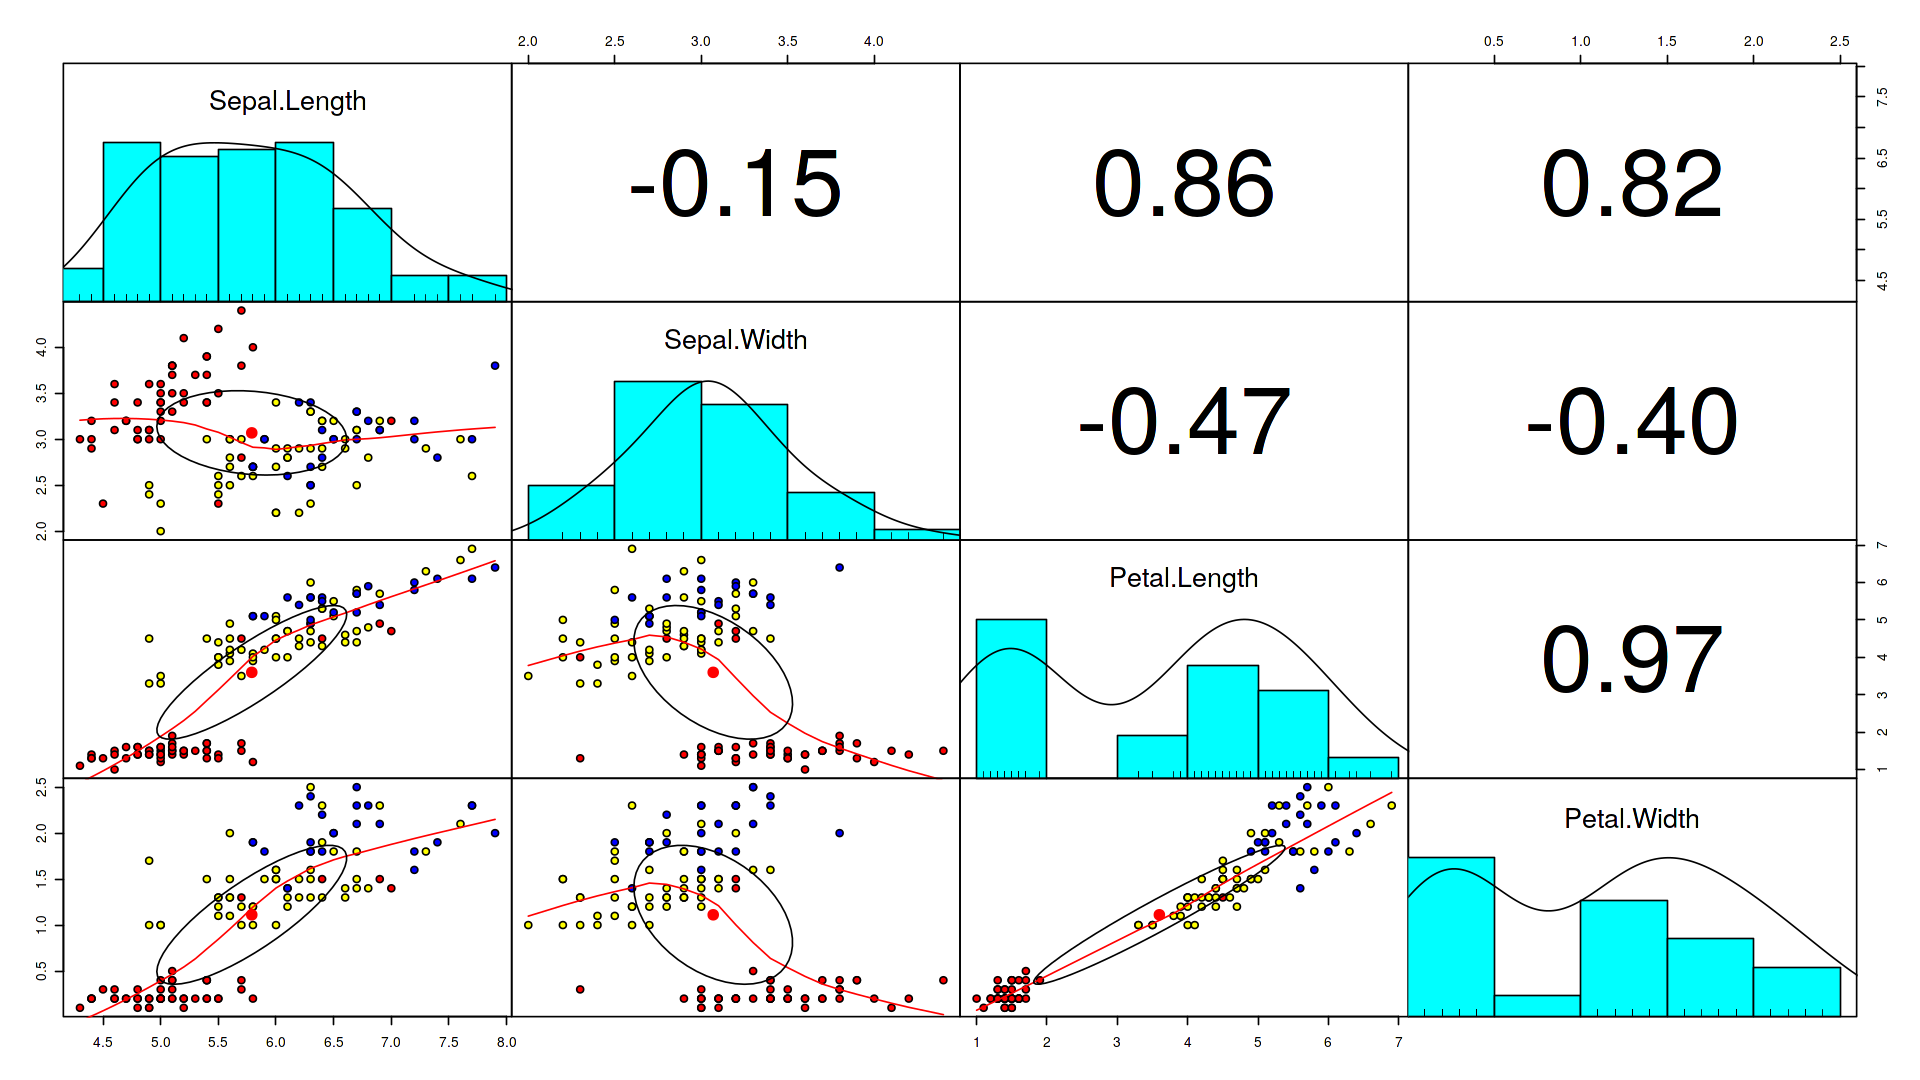

In [19]:
# Scatter Plot & Correlations

library(psych)

pairs.panels(training[,-5],
            gap = 0,
            bg=c("red","yellow","blue")[iris$Species],
            pch = 21)

**High correlation among independent variables lead to "Multicolinearity" Problem.**

In [21]:
# Principal componet analysis

pc = prcomp(training[,-5],
          center = TRUE,
          scale. = TRUE)

attributes(pc)

$names
[1] "sdev"     "rotation" "center"   "scale"    "x"       

$class
[1] "prcomp"

In [22]:
pc$center

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
    5.790000     3.069167     3.597500     1.111667

In [24]:
mean(training$Sepal.Length)

[1] 5.79

In [25]:
pc$scale

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
   0.8234382    0.4588615    1.7872782    0.7556158

In [26]:
sd(training$Sepal.Length)

[1] 0.8234382

In [27]:
print(pc)

Standard deviations (1, .., p=4):
[1] 1.7173318 0.9403519 0.3843232 0.1371332

Rotation (n x k) = (4 x 4):
                    PC1         PC2        PC3        PC4
Sepal.Length  0.5147163 -0.39817685  0.7242679  0.2279438
Sepal.Width  -0.2926048 -0.91328503 -0.2557463 -0.1220110
Petal.Length  0.5772530 -0.02932037 -0.1755427 -0.7969342
Petal.Width   0.5623421 -0.08065952 -0.6158040  0.5459403


In [28]:
summary(pc)

Importance of components:
                          PC1    PC2     PC3    PC4
Standard deviation     1.7173 0.9404 0.38432 0.1371
Proportion of Variance 0.7373 0.2211 0.03693 0.0047
Cumulative Proportion  0.7373 0.9584 0.99530 1.0000

**From above summary we can say first two components explain majority of variability.**

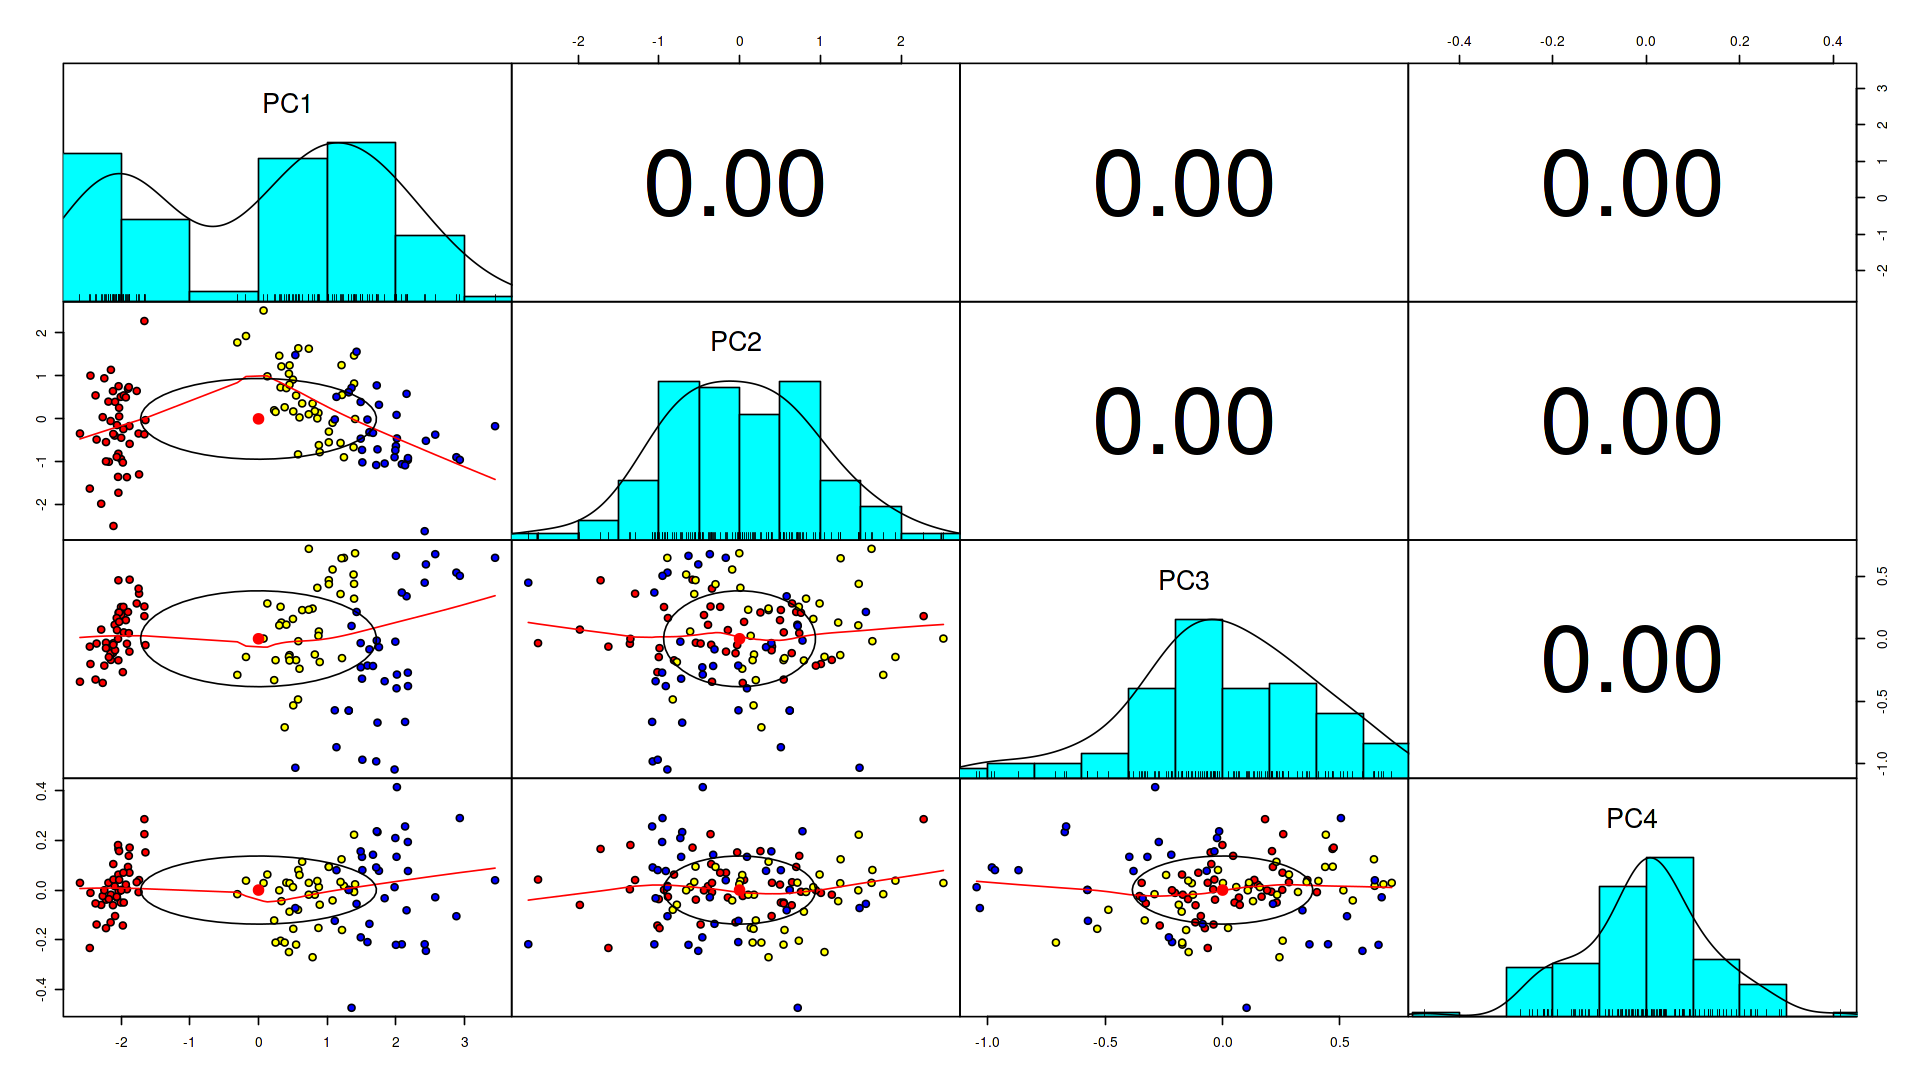

In [31]:
# Orthogonality of PCs

pairs.panels(pc$x,
            gap=0,
            bg = c("red", "yellow", "blue")[training$Species],
            pch = 21)

**By making Principal componet we see correaltion to be zero. That helps to get rid of multicolinearity problem.**

In [51]:
library(devtools)
install_github("vqv/ggbiplot", force = TRUE)


✔  checking for file ‘/tmp/RtmpRB1FTy/remotesc1cd6cf27/vqv-ggbiplot-7325e88/DESCRIPTION’
─  preparing ‘ggbiplot’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘ggbiplot_0.55.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



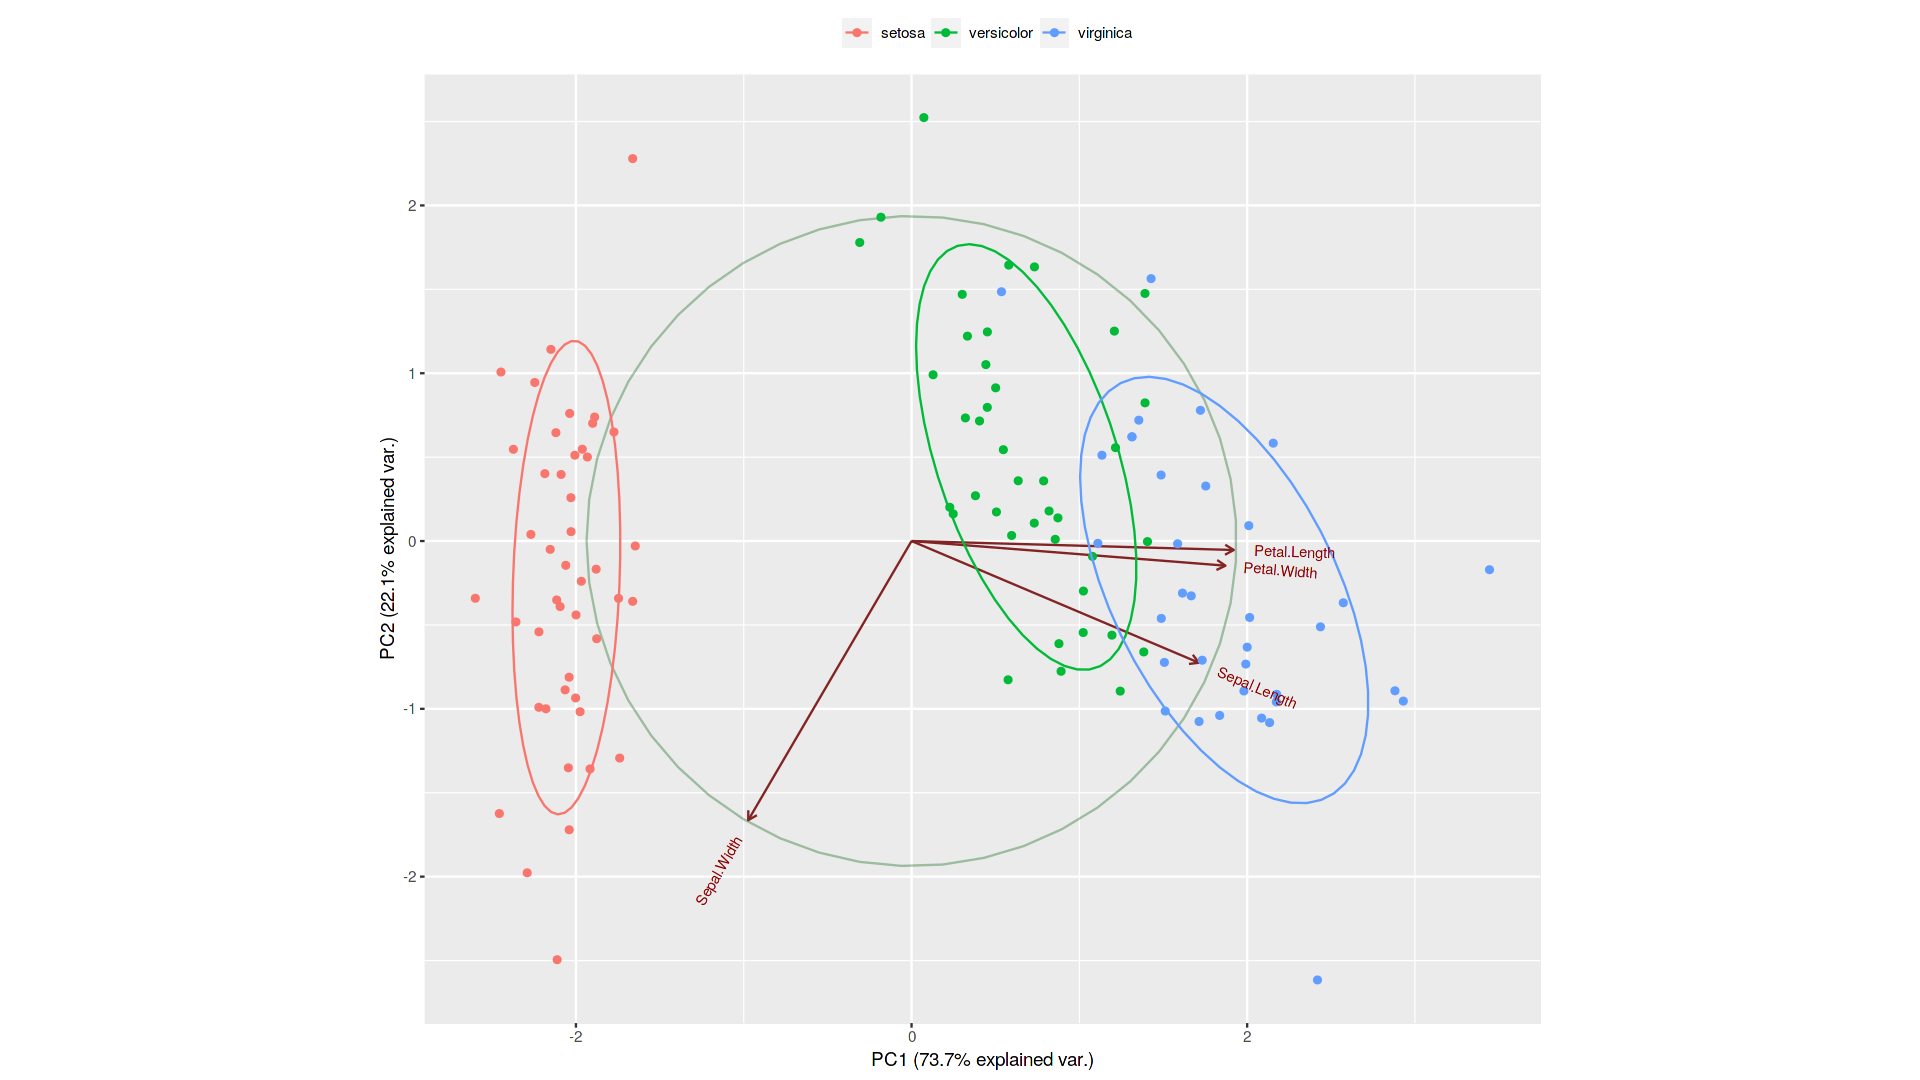

In [52]:

library(ggbiplot)

g = ggbiplot(pc,
            obs.scale = 1,
            bar.scale = 1,
            groups = training$Species,
            ellipse = TRUE,
            circle = TRUE,
            ellipse.prob = 0.68)

g = g + scale_color_discrete(name = '')

g = g + theme(legend.direction = 'horizontal',
             legend.position = 'top')

print(g)

**Diagram showing principal compoents 1 and 2. Third pc3 is in blue color. Ellispe contains 68 percent of the variability. There are 4 arrow represeting each variables. Arrows close to each other have higher correlations. Sepal. Width has lower corellation with other variables. Sepal. Width is on negative side so it has negative correlation. Others are on the positive side and thus show positive correlation. AS pc2 increases Sepal. Width goes down.**

In [53]:
# Prediction with Principal Components

trg = predict(pc, training)

print(trg)

           PC1          PC2           PC3           PC4
1   -2.0942621 -0.390479892  0.1117895752  0.0155964510
2   -1.9004407  0.701394964  0.2145512665  0.0931822321
3   -2.1852900  0.401680656 -0.0630099904  0.0292277018
4   -2.1194349  0.645787862 -0.1148751719 -0.0610428409
5   -2.2205378 -0.541157297 -0.0319019490 -0.0386754453
6   -1.9160708 -1.357948199 -0.0397399215  0.0030168844
7   -2.2686138  0.039655263 -0.3537552466 -0.0239723433
8   -2.0607048 -0.144732182  0.0697461852 -0.0300848294
9   -2.1492140  1.142204792 -0.1694965776 -0.0186376148
10  -2.0063320  0.511396324  0.2304914899 -0.0502480219
11  -2.0019748 -0.935252226  0.2543675423  0.0008731820
12  -2.1534233 -0.049661878 -0.1159887290 -0.1300380062
13  -2.0373705  0.760425041  0.2080916828 -0.0067507777
14  -2.4468051  1.007123571 -0.2022257498 -0.0113927767
15  -2.0401384 -1.720850758  0.4684542738  0.1655989805
16  -2.1119798 -2.494897451 -0.0349014685  0.0422915851
17  -2.0452623 -1.351386184 -0.0004527557  0.181

In [59]:
trg = data.frame(trg, training[5])

print(trg)

           PC1          PC2           PC3           PC4    Species  Species.1
1   -2.0942621 -0.390479892  0.1117895752  0.0155964510     setosa     setosa
2   -1.9004407  0.701394964  0.2145512665  0.0931822321     setosa     setosa
3   -2.1852900  0.401680656 -0.0630099904  0.0292277018     setosa     setosa
4   -2.1194349  0.645787862 -0.1148751719 -0.0610428409     setosa     setosa
5   -2.2205378 -0.541157297 -0.0319019490 -0.0386754453     setosa     setosa
6   -1.9160708 -1.357948199 -0.0397399215  0.0030168844     setosa     setosa
7   -2.2686138  0.039655263 -0.3537552466 -0.0239723433     setosa     setosa
8   -2.0607048 -0.144732182  0.0697461852 -0.0300848294     setosa     setosa
9   -2.1492140  1.142204792 -0.1694965776 -0.0186376148     setosa     setosa
10  -2.0063320  0.511396324  0.2304914899 -0.0502480219     setosa     setosa
11  -2.0019748 -0.935252226  0.2543675423  0.0008731820     setosa     setosa
12  -2.1534233 -0.049661878 -0.1159887290 -0.1300380062     seto

In [65]:
tst = predict(pc, testing)
tst = data.frame(tst, testing[5])

In [61]:
# Multinomical Logistic regression

library(nnet)

trg$Species = relevel(trg$Species, ref = "setosa")

mymodel = multinom(Species~PC1+PC2, data = trg)

summary(mymodel)

# weights:  12 (6 variable)
initial  value 131.833475 
iter  10 value 20.607042
iter  20 value 18.331120
iter  30 value 18.204474
iter  40 value 18.199783
iter  50 value 18.199009
iter  60 value 18.198506
final  value 18.198269 
converged


Call:
multinom(formula = Species ~ PC1 + PC2, data = trg)

Coefficients:
           (Intercept)      PC1      PC2
versicolor   7.2345029 14.05161 3.167254
virginica   -0.5757544 20.12094 3.625377

Std. Errors:
           (Intercept)      PC1      PC2
versicolor    187.5986 106.3766 127.8815
virginica     187.6093 106.3872 127.8829

Residual Deviance: 36.39654 
AIC: 48.39654 

In [62]:
# Confusion Matrix & Misclassification Error - training

p = predict(mymodel, trg)

tab = table(p, trg$Species)

print(tab)

            
p            setosa versicolor virginica
  setosa         45          0         0
  versicolor      0         35         3
  virginica       0          5        32


In [63]:
1 - sum(diag(tab))/sum(tab)

[1] 0.06666667

In [68]:
# Confusion Matrix & Misclassification Error - testing

p1 = predict(mymodel, tst)

tab1 = table(p1, tst$Species)

tab1

1-sum(diag(tab1))/sum(tab1)

            
p1           setosa versicolor virginica
  setosa          5          0         0
  versicolor      0          9         3
  virginica       0          1        12

[1] 0.1333333

  **PCA Advantage : Useful for dimensional reduction for high-dimensional data analysis.
 **Helps reduce the number of predictor items using principal components.**                                                                                          **Helps to make predictor items independent & avoid multicollinearity problem.**
 **Allows interpretation of many variables using 2-dimensional analysis.**
 **Can be used for developing prediction models**

**Disadvantages : Only numeric variables can be used.**
**Prediction models are less interpretable**